In [379]:
import pandas as pd
import numpy as np

In [380]:
df1=pd.read_csv("books.csv",error_bad_lines=False)
df2=pd.read_csv("books2.csv",error_bad_lines=False)
ratings=pd.read_csv("Ratings.csv",error_bad_lines=False)
user=pd.read_csv("Users.csv",error_bad_lines=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12320\615020521.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1=pd.read_csv("books.csv",error_bad_lines=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12320\615020521.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2=pd.read_csv("books2.csv",error_bad_lines=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12320\615020521.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("books2.csv",error_bad_lines=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12320\615020521.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings=pd.read_csv("Rat

In [381]:
df1.shape

(52478, 25)

In [382]:
df1=df1[df1['numRatings']>=1000].sort_values('rating',ascending=False).head(15000)
df1.shape



(15000, 25)

In [383]:
df1.head(5)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
256,24812.The_Complete_Calvin_and_Hobbes,The Complete Calvin and Hobbes,Calvin and Hobbes,Bill Watterson,4.82,[ \n Box Set\n | Book One | Book Two | Book T...,English,9780740748479,"['Comics', 'Humor', 'Graphic Novels', 'Fiction...","['Calvin', 'Hobbes']",...,NaN,[],34893,"['30247', '3561', '782', '167', '136']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,50709,632,110.67
9529,783510.Nutuk,Nutuk,NaN,"Mustafa Kemal Atatürk, Zeynep Korkmaz (Editor)",4.79,"Atatürk`ün kendi kaleminden çıkan bu eser, yin...",Turkish,9789751604019,"['History', 'Turkish Literature', 'Turkish', '...",['Mustafa Kemal Atatürk'],...,10/15/27,[],3658,"['3176', '300', '107', '42', '33']",98.0,"['Turkey', 'Samsun (Turkey)', 'Erzurum (Turkey...",https://i.gr-assets.com/images/S/compressed.ph...,269,3,65.37
26500,11221285-the-way-of-kings-part-2,"The Way of Kings, Part 2","The Stormlight Archive #1, part 2",Brandon Sanderson (Goodreads Author),4.79,According to mythology mankind used to live in...,English,9780575102484,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...",[],...,10/30/10,[],13194,"['10828', '2020', '293', '38', '15']",100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,97,1,3.30
7008,8.Harry_Potter_Boxed_Set_Books_1_5,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",NaN,"J.K. Rowling, Mary GrandPré (Illustrator)",4.78,Box Set containing Harry Potter and the Sorcer...,English,9780439682589,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",[],...,10/01/03,[],52749,"['44933', '5566', '1417', '333', '500']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,381,4,31.02
2756,5031805-esv-study-bible,ESV Study Bible,NaN,"Anonymous, Lane T. Dennis (Editor), Wayne Grud...",4.78,The ESV Study Bible was designed to help you u...,English,9781433502415,"['Christian', 'Theology', 'Reference', 'Christ...","['Noah (Bible)', 'Adam (Bible)']",...,01/01/02,[],12868,"['10945', '1293', '408', '114', '108']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,1296,14,32.58


In [384]:
books_with_genre=df1.drop([ 'characters','language','description','coverImg','series','likedPercent','awards',"firstPublishDate","price","publishDate","edition","bbeScore","bbeVotes","setting","pages","bookFormat","ratingsByStars"],axis=1)

In [385]:
books_with_genre.columns

Index(['bookId', 'title', 'author', 'rating', 'isbn', 'genres', 'publisher',
       'numRatings'],
      dtype='object')

In [386]:

# df4=df2.rename({'ISBN':'isbn','Book-Title':'title'}, axis=1)

# df4.columns
# df2=df2.dropna()



In [387]:
books_with_genre=books_with_genre.dropna()
books_with_genre.isnull().sum()
books_with_genre.shape

(14191, 8)

In [388]:
books_with_genre=books_with_genre.drop_duplicates()
books_with_genre.duplicated().sum()

0

In [389]:
from ast import literal_eval

from numpy import split


# data=books_with_genre['genres'].apply(lambda x:[literal_eval(x)])
# data
def convert(obj):
    return literal_eval(obj)

def convertToList(obj):
    return obj.split(',')


In [390]:
books_with_genre.iloc[0].publisher


'Andrews McMeel Publishing'

In [391]:

data=books_with_genre.iloc[6].author
data=data.split(',')
data

['Francine Rivers (Goodreads Author)']

In [392]:
# books_with_genre['genres'].apply(lambda x:[i.replace(" ","") for i in x])
books_with_genre['author']=books_with_genre['author'].apply(convertToList)
books_with_genre['publisher']=books_with_genre['publisher'].apply(convertToList)
books_with_genre['genres']=books_with_genre['genres'].apply(convert)

In [393]:
books_with_genre['genres']=books_with_genre['genres'].apply(lambda x:[i.replace(" ","") for i in x])
books_with_genre['author']=books_with_genre['author'].apply(lambda x:[i.replace(" ","") for i in x])
books_with_genre['publisher']=books_with_genre['publisher'].apply(lambda x:[i.replace(" ","") for i in x])

In [394]:
books_with_genre.iloc[6].author

['FrancineRivers(GoodreadsAuthor)']

In [395]:
books_with_genre.iloc[6].publisher


['TyndaleHouse']

In [396]:
books_with_genre['tag']=books_with_genre['author']+books_with_genre['genres']+books_with_genre['publisher']

In [397]:
books_with_genre.iloc[1].tag

['MustafaKemalAtatürk',
 'ZeynepKorkmaz(Editor)',
 'History',
 'TurkishLiterature',
 'Turkish',
 'Politics',
 'Nonfiction',
 'Classics',
 'Biography',
 'Education',
 'Historical',
 'Literature',
 'AtatürkAraştırmaMerkezi']

In [398]:
books_with_genre.head(6)

,bookId,title,author,rating,isbn,genres,publisher,numRatings,tag
256,24812.The_Complete_Calvin_and_Hobbes,The Complete Calvin and Hobbes,[BillWatterson],4.82,9780740748479,"[Comics, Humor, GraphicNovels, Fiction, Comedy...",[AndrewsMcMeelPublishing],34893,"[BillWatterson, Comics, Humor, GraphicNovels, ..."
9529,783510.Nutuk,Nutuk,"[MustafaKemalAtatürk, ZeynepKorkmaz(Editor)]",4.79,9789751604019,"[History, TurkishLiterature, Turkish, Politics...",[AtatürkAraştırmaMerkezi],3658,"[MustafaKemalAtatürk, ZeynepKorkmaz(Editor), H..."
26500,11221285-the-way-of-kings-part-2,"The Way of Kings, Part 2",[BrandonSanderson(GoodreadsAuthor)],4.79,9780575102484,"[Fantasy, Fiction, EpicFantasy, HighFantasy, A...",[Gollancz],13194,"[BrandonSanderson(GoodreadsAuthor), Fantasy, F..."
7008,8.Harry_Potter_Boxed_Set_Books_1_5,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","[J.K.Rowling, MaryGrandPré(Illustrator)]",4.78,9780439682589,"[Fantasy, YoungAdult, Fiction, Magic, Adventur...",[Scholastic],52749,"[J.K.Rowling, MaryGrandPré(Illustrator), Fanta..."
2756,5031805-esv-study-bible,ESV Study Bible,"[Anonymous, LaneT.Dennis(Editor), WayneGrudem(...",4.78,9781433502415,"[Christian, Theology, Reference, Christianity,...",[Crossway],12868,"[Anonymous, LaneT.Dennis(Editor), WayneGrudem(..."
19551,10607462-the-lds-scriptures,The LDS Scriptures: Unabridged Complete King J...,"[TheChurchofJesusChristofLatter-daySaints, Jos...",4.77,2940012200709,"[Nonfiction, Religion, Church, Lds, Christian,...",[LDSScriptures|LDSQuadrupleCombination|KJV],1329,"[TheChurchofJesusChristofLatter-daySaints, Jos..."


In [399]:
books_with_genre.columns

Index(['bookId', 'title', 'author', 'rating', 'isbn', 'genres', 'publisher',
       'numRatings', 'tag'],
      dtype='object')

In [400]:
new_df=books_with_genre[['bookId','title','isbn','rating','numRatings','tag']]

In [401]:
new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12320\4079141722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))


In [402]:
new_df.iloc[0].tag

'BillWatterson Comics Humor GraphicNovels Fiction Comedy Classics GraphicNovelsComics ComicStrips Childrens ComicBook AndrewsMcMeelPublishing'

In [403]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [404]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i)) 
    return " ".join(y)

In [405]:
new_df['tag']=new_df['tag'].apply(stem)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12320\599176683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(stem)


### Data Visualization

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt
df1.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

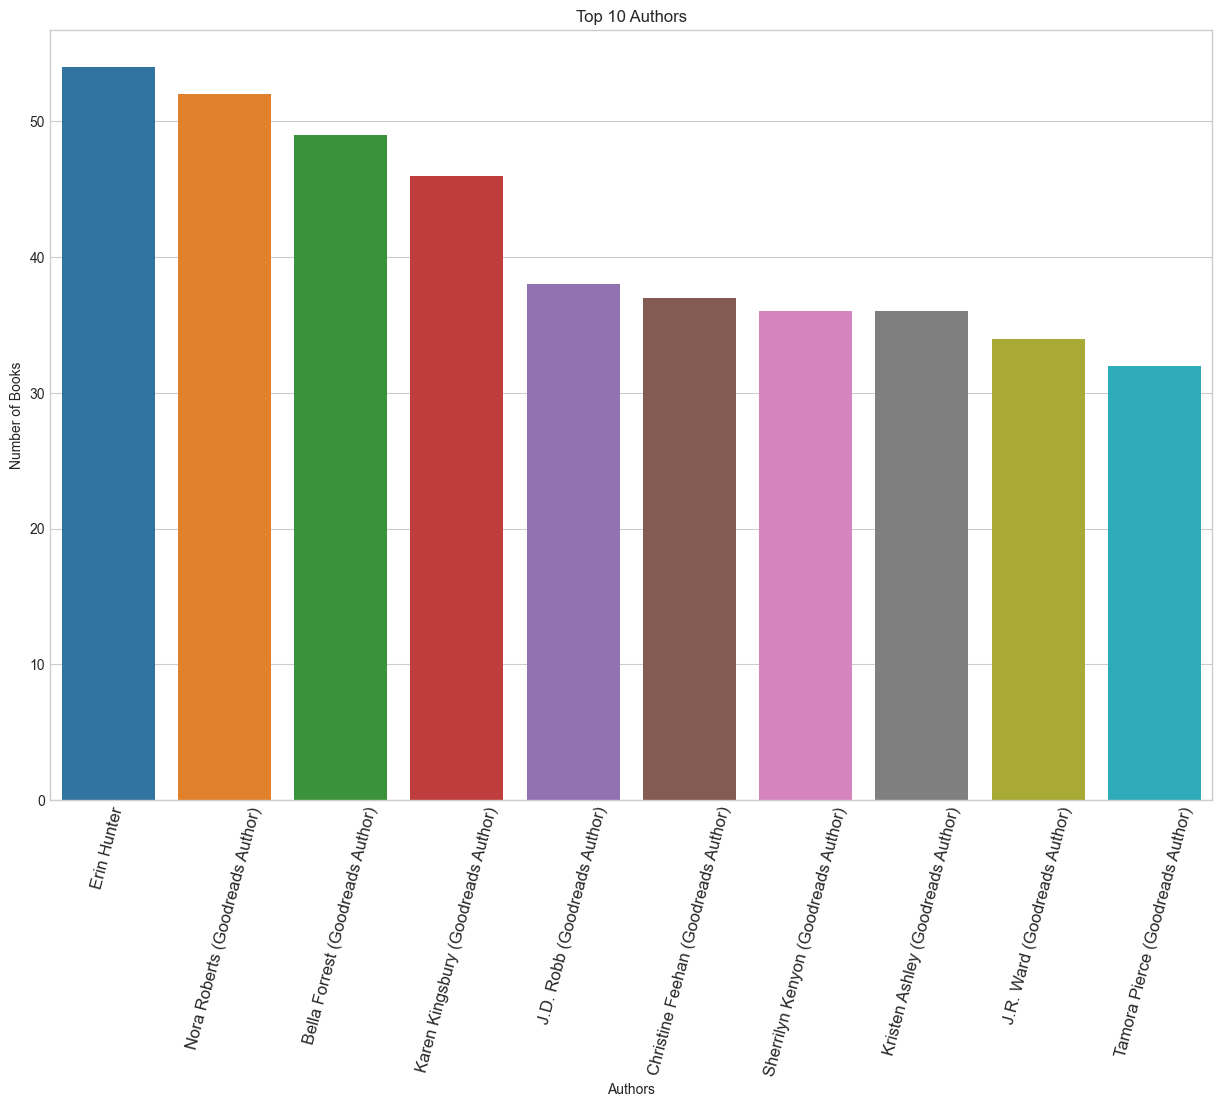

In [407]:
plt.figure(figsize=(15,10))
sns.countplot(x= 'author',data=df1,order=df1['author'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors")
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.xticks(rotation=75,fontsize=12)
plt.show()

In [408]:
top_15_publisher = df1.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_index('publisher')
top_15_publisher.head(15)

,title
publisher,
HarperCollins,244
Vintage,183
Avon,139
Del Rey,134
Bantam,129
Ballantine Books,128
Penguin Books,128
VIZ Media LLC,110
St. Martin's Press,107


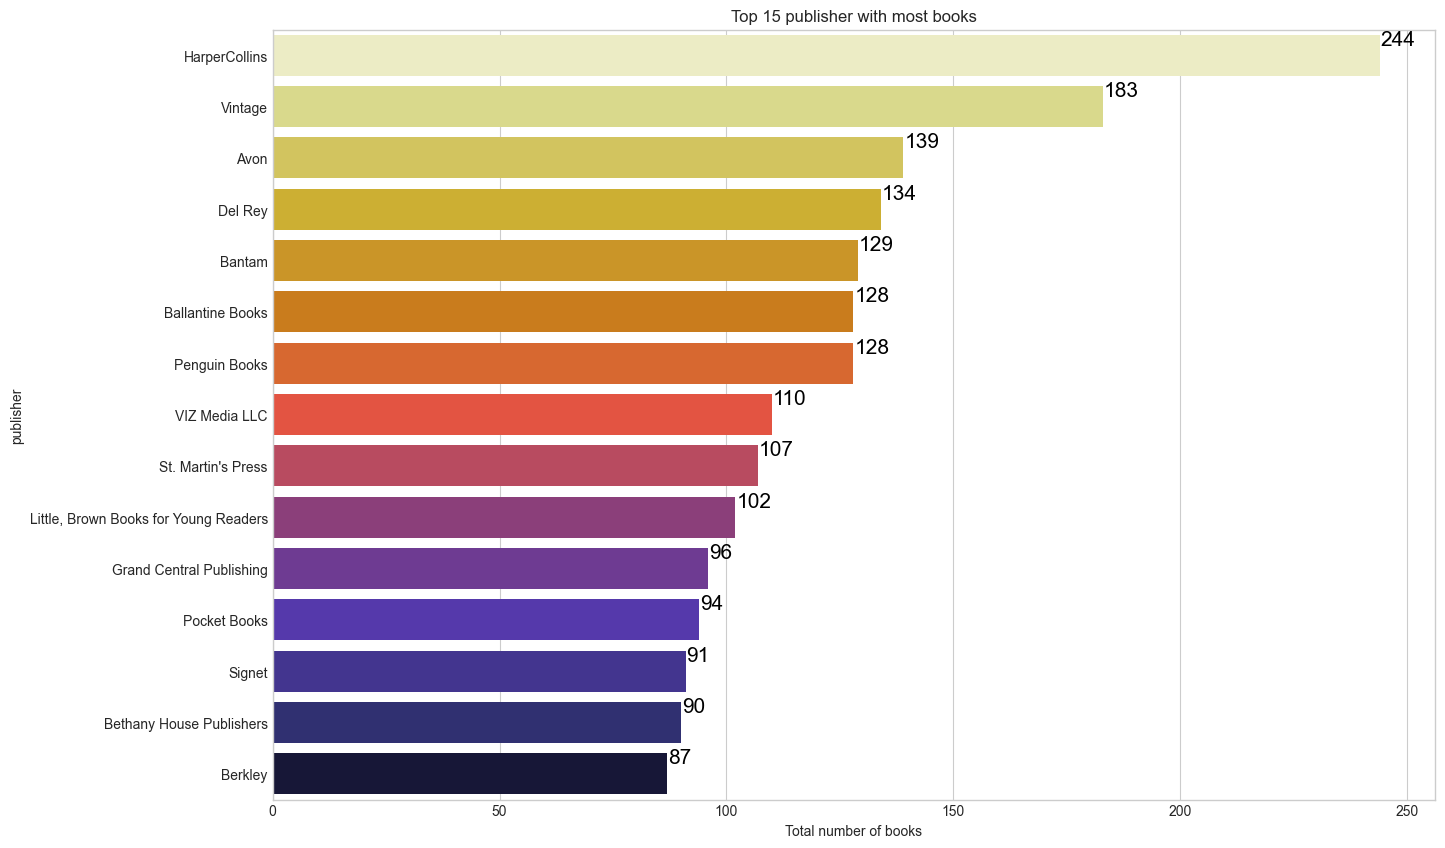

In [409]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=top_15_publisher['title'],y= top_15_publisher.index, palette='CMRmap_r')

ax.set_title("Top 15 publisher with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

### Popularity Based Recommendation

In [410]:
popular=new_df[new_df['numRatings']>=10000].sort_values('rating',ascending=False).head(10)

In [411]:
popular

,bookId,title,isbn,rating,numRatings,tag
256,24812.The_Complete_Calvin_and_Hobbes,The Complete Calvin and Hobbes,9780740748479,4.82,34893,billwatterson comic humor graphicnovel fiction...
26500,11221285-the-way-of-kings-part-2,"The Way of Kings, Part 2",9780575102484,4.79,13194,brandonsanderson(goodreadsauthor) fantasi fict...
7008,8.Harry_Potter_Boxed_Set_Books_1_5,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",9780439682589,4.78,52749,j.k.rowl marygrandpré(illustrator) fantasi you...
2756,5031805-esv-study-bible,ESV Study Bible,9781433502415,4.78,12868,anonym lanet.dennis(editor) waynegrudem(editor...
2699,95602.Mark_of_the_Lion_Trilogy,Mark of the Lion Trilogy,9780842339520,4.77,11402,francinerivers(goodreadsauthor) christianfict ...
5564,24814.It_s_a_Magical_World,It's a Magical World,9780836221367,4.76,25874,billwatterson comic humor graphicnovel fiction...
14496,70489.There_s_Treasure_Everywhere,There's Treasure Everywhere,9780836213126,4.75,19726,billwatterson comic humor fiction graphicnovel...
635,17332218-words-of-radiance,Words of Radiance,9780765326362,4.75,207369,brandonsanderson(goodreadsauthor) fantasi fict...
3582,24815.The_Indispensable_Calvin_and_Hobbes,The Indispensable Calvin and Hobbes,9780751500288,4.74,19492,billwatterson comic humor fiction graphicnovel...
1565,59715.The_Authoritative_Calvin_and_Hobbes,The Authoritative Calvin and Hobbes: A Calvin ...,9780751507959,4.74,20857,billwatterson comic humor graphicnovel fiction...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12320\1061937486.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


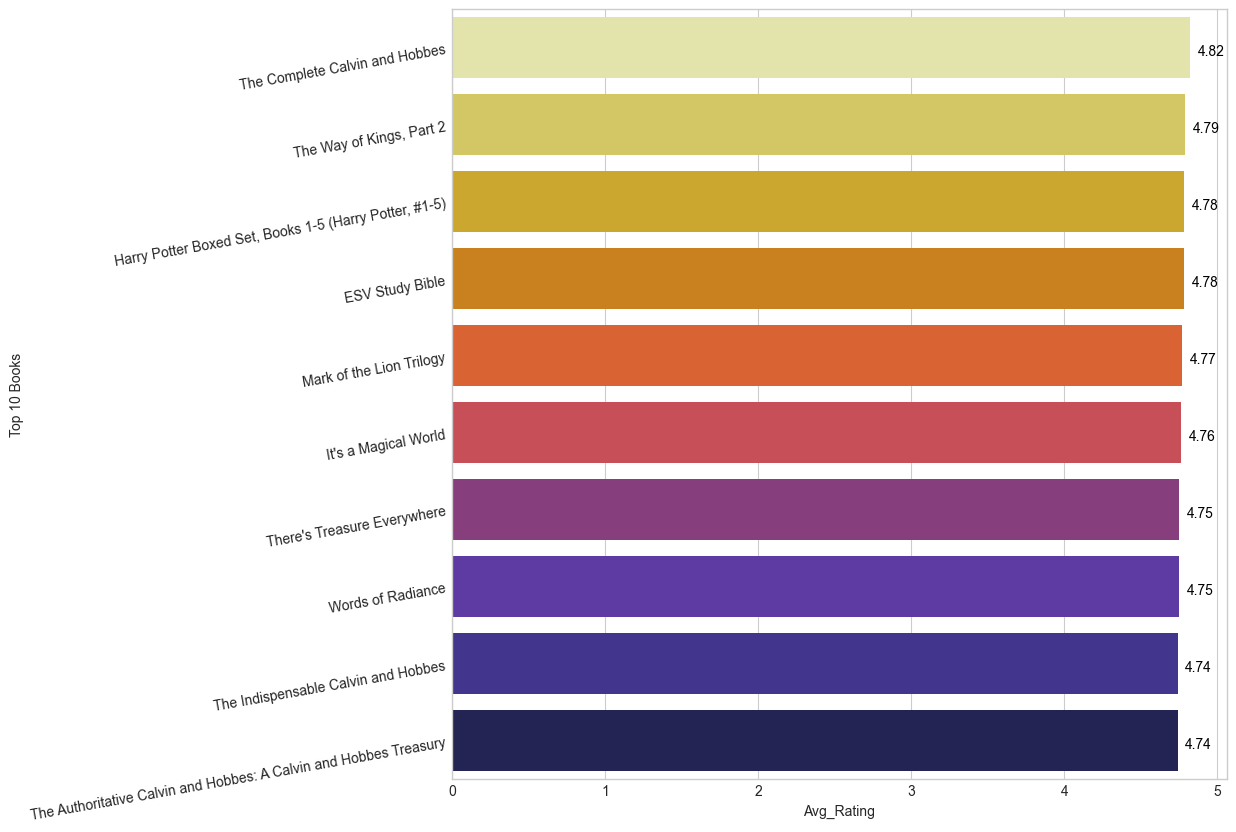

In [412]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))

data = popular.sort_values(by='rating', ascending=False).head(10)
gr = sns.barplot(x=data['rating'], y="title", data=data, palette="CMRmap_r")
plt.xlabel('Avg_Rating')
plt.ylabel("Top 10 Books")
plt.yticks(rotation=10)
for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

### Content Base Recommendation

In [413]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000,stop_words='english')

In [414]:
vectors=cv.fit_transform(new_df['tag']).toarray()

In [415]:
similarity=cosine_similarity(vectors)
# similarity=model_knn.fit(vectors)

In [416]:
def recommend(book):
    book_index=new_df[new_df['title']==book].index[0]
    distance=similarity[book_index]
    book_list=sorted(list(enumerate(distance)),reverse=True ,key=lambda x:x[1])[1:11]
    for i in book_list:
        print(new_df.iloc[i[0]].title)

In [425]:
recommend('Batman: Knightfall')

IndexError: index 16934 is out of bounds for axis 0 with size 14179

### Collaborative Filtering Based Recommender

In [418]:

df2.columns
df2=df2.drop(['Year-Of-Publication','Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)
rating_with_name=ratings.merge(df2, on='ISBN')

In [419]:
rating_with_name = rating_with_name.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (rating_with_name.
    groupby(by = ['Book-Title'])['Book-Rating'].
    count().
    reset_index().
    rename(columns = {'Book-Rating': 'totalRatingCount'})
    [['Book-Title', 'totalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [420]:
rating_with_totalRatingCount = rating_with_name.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60


In [421]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60


In [422]:
combined = rating_popular_book.merge(user, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("india|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,totalRatingCount,Location
73,24878,0446520802,7,The Notebook,Nicholas Sparks,Warner Books,650,"ottawa, ontario, canada"
75,27617,0446520802,9,The Notebook,Nicholas Sparks,Warner Books,650,"beaverton, ontario, canada"
76,28204,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,650,"south ohio, nova scotia, canada"
121,157823,0446520802,10,The Notebook,Nicholas Sparks,Warner Books,650,"guelph, ontario, canada"
133,188010,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,650,"edmonton, alberta, canada"


### Model Building

In [423]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [424]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

for i in range(0,6):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for The Eyes of Darkness:

1: The Mask
2: DEAD BY SUNSET : DEAD BY SUNSET
3: All That Glitters (Landry)
4: Full Circle
5: Jewels
